In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:

file = pd.read_csv('../data/Inplaydata19.csv', error_bad_lines=False)
dataFrame = pd.DataFrame(file)



In [5]:
# Single, Double, Triple, HomeRun, (field_out, force_out, fielders_choice) = out, 
# grounded_into_double_play, sac_fly, sac_bunt,

#Transform values into binary classification
d = {
    'single': 1, 
    'double': 1, 
    'triple': 1, 
    'home_run': 1, 
    'field_out': 0,
    'force_out': 0,
    'fielders_choice': 1,
    'grounded_into_double_play': 0,
    'sac_fly': 0,
    'sac_bunt': 0,
    'double_play': 0,
    'fielders_choice_out': 0,
    'catcher_interf': 1,
    'triple_play': 0,
    'field_error': 1,
    'sac_fly_double_play': 0,
    'sac_bunt_double_play': 0
}

dataFrame = dataFrame.replace(d)


In [31]:
X = pd.DataFrame()
X['launch_speed'] = dataFrame['launch_speed']
X['launch_angle'] = dataFrame['launch_angle']
X['hc_x']=125-dataFrame['hc_x']
X['hc_y']=198-dataFrame['hc_y']
X['events'] = dataFrame['events']
X.insert(0, 'Ones', 1)

X=X[X['hc_y']!=0]


X = X.dropna()

y = X['events']

X = X.iloc[:, 0:-1]

X['vert_rad'] = X['launch_angle']*np.pi/180
X['hor_rad']=np.arctan(X['hc_x']/X['hc_y'])
X['hor_deg']=X['hor_rad']*(180/np.pi)

print(X)

        Ones  launch_speed  launch_angle    hc_x    hc_y  vert_rad   hor_rad  \
0          1          40.0         -36.0    2.19    6.18 -0.628319  0.340562   
1          1          77.8         -37.3   10.67   37.68 -0.651008  0.275950   
2          1          80.6          35.5   48.54  117.45  0.619592  0.391904   
3          1         106.6          14.2   59.99  127.42  0.247837  0.440020   
4          1          86.9          44.3   -7.50  114.60  0.773181 -0.065352   
5          1          57.4           3.9  -23.83   38.71  0.068068 -0.551814   
6          1          97.3          25.6  -91.49  159.56  0.446804 -0.520623   
7          1          84.5          51.0   72.62   69.71  0.890118  0.805841   
8          1          89.5          21.5   10.36  134.90  0.375246  0.076647   
9          1          99.7          42.7  -13.07  139.00  0.745256 -0.093753   
10         1          73.5         -31.5  -24.10   48.83 -0.549779 -0.458474   
11         1         103.1         -10.6

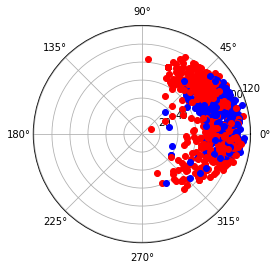

In [32]:
plt.figure()
color = [[0,0,0]]
for i in range(800):
    if y[i] == 0:
        plt.polar(X.loc[i, 'vert_rad'], X.loc[i, 'launch_speed'], 'ro')
    elif y[i] == 1:
        plt.polar(X.loc[i, 'vert_rad'], X.loc[i, 'launch_speed'], 'bo')
     
    
plt.show()


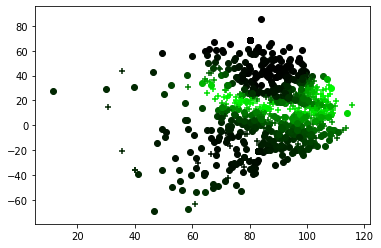

In [8]:
plt.figure()
color = [[0,0,0]]
for i in range(800):
    if y[i] == 0:
        marker="o"
        #color = [[0,0,0]]
    elif y[i] == 1:
        marker="+"
        #color = [[0,1,0]]
    
    colored= X['estimated_ba_using_speedangle'][i]
    color=[[0,colored,0]]
    plt.scatter(X.loc[i, 'launch_speed'], X.loc[i, 'launch_angle'], c=color, marker=marker) 
    
plt.show()

In [21]:
#Trim data
sliceX = X.iloc[0:1000, 0:3]
sliceX['hor_rad'] = X['hor_rad'].iloc[0:1000]
sliceX['hor_deg'] = X['hor_deg'].iloc[0:1000]
slicey = y.iloc[0:1000]



sliceX.iloc[0:1000,1:4] = (sliceX.iloc[0:1000,1:4]-np.mean(sliceX.iloc[0:1000,1:4]))/(np.std(sliceX.iloc[0:1000,1:4]))

print(sliceX)


C = 10
rbf_svc = svm.SVC(kernel='rbf', C=C, gamma='auto')
scoresRBF = cross_val_score(rbf_svc, sliceX, slicey, cv=10, scoring='accuracy')
print(np.mean(scoresRBF))

      Ones  launch_speed  launch_angle   hor_rad    hor_deg
0        1     -3.367050     -1.843055  0.726349  19.512745
1        1     -0.664872     -1.890281  0.598217  15.810748
2        1     -0.464710      0.754373  0.828165  22.454439
3        1      1.393931     -0.019406  0.923584  25.211301
4        1     -0.014347      1.074057 -0.078615  -3.744384
5        1     -2.123190     -0.393581 -1.043314 -31.616585
6        1      0.729109      0.394729 -0.981460 -29.829499
7        1     -0.185914      1.317452  1.649041  46.171274
8        1      0.171517      0.245786  0.202982   4.391560
9        1      0.900676      1.015932 -0.134938  -5.371658
10       1     -0.972262     -1.679581 -0.858212 -26.268599
11       1      1.143729     -0.920332  0.899677  24.520578
12       1     -0.857884      0.176763 -1.531194 -45.712477
13       1      0.514651     -0.484400 -1.076765 -32.583056
14       1     -0.836439      0.300277  0.731204  19.653027
15       1      0.714812      0.736209 -

In [36]:
testX = X.iloc[10000:11000, 0:3]
testX['hor_rad'] = X['hor_rad'].iloc[10000:11000]
testX['hor_deg'] = X['hor_deg'].iloc[10000:11000]
testy = y.iloc[10000:11000]
testX.iloc[10000:11000,1:4] = (testX.iloc[10000:11000,1:4]-np.mean(testX.iloc[10000:11000,1:4]))/(np.std(testX.iloc[10000:10000,1:4]))


In [22]:
hyperparams = { 
    'C': np.linspace(1, 100, 100),
    'gamma': np.linspace(0.00, 5, 100),
    'class_weight': ['balanced', None],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

rs = RandomizedSearchCV(svm.SVC(), hyperparams, cv=10, n_iter=25, verbose=2, scoring='accuracy')
rs.fit(sliceX, slicey)
print(rs.best_params_)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV] kernel=rbf, gamma=0.0, class_weight=balanced, C=92.0 ............
[CV]  kernel=rbf, gamma=0.0, class_weight=balanced, C=92.0, total=   0.1s
[CV] kernel=rbf, gamma=0.0, class_weight=balanced, C=92.0 ............
[CV]  kernel=rbf, gamma=0.0, class_weight=balanced, C=92.0, total=   0.0s
[CV] kernel=rbf, gamma=0.0, class_weight=balanced, C=92.0 ............
[CV]  kernel=rbf, gamma=0.0, class_weight=balanced, C=92.0, total=   0.0s
[CV] kernel=rbf, gamma=0.0, class_weight=balanced, C=92.0 ............
[CV]  kernel=rbf, gamma=0.0, class_weight=balanced, C=92.0, total=   0.0s
[CV] kernel=rbf, gamma=0.0, class_weight=balanced, C=92.0 ............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  kernel=rbf, gamma=0.0, class_weight=balanced, C=92.0, total=   0.0s
[CV] kernel=rbf, gamma=0.0, class_weight=balanced, C=92.0 ............
[CV]  kernel=rbf, gamma=0.0, class_weight=balanced, C=92.0, total=   0.0s
[CV] kernel=rbf, gamma=0.0, class_weight=balanced, C=92.0 ............
[CV]  kernel=rbf, gamma=0.0, class_weight=balanced, C=92.0, total=   0.0s
[CV] kernel=rbf, gamma=0.0, class_weight=balanced, C=92.0 ............
[CV]  kernel=rbf, gamma=0.0, class_weight=balanced, C=92.0, total=   0.0s
[CV] kernel=rbf, gamma=0.0, class_weight=balanced, C=92.0 ............
[CV]  kernel=rbf, gamma=0.0, class_weight=balanced, C=92.0, total=   0.0s
[CV] kernel=rbf, gamma=0.0, class_weight=balanced, C=92.0 ............
[CV]  kernel=rbf, gamma=0.0, class_weight=balanced, C=92.0, total=   0.0s
[CV] kernel=sigmoid, gamma=2.9797979797979797, class_weight=balanced, C=30.0 
[CV]  kernel=sigmoid, gamma=2.9797979797979797, class_weight=balanced, C=30.0, total=   0.0s
[CV] kernel=sigmoid, gamma=2.9

KeyboardInterrupt: 

In [ ]:
rbf_svc = svm.SVC(kernel='rbf', C=68, gamma=0.55, class_weight='balanced')
scoresRBF = cross_val_score(rbf_svc, sliceX, slicey, cv=10, scoring='accuracy')
print(np.mean(scoresRBF))

In [6]:
rf = RandomForestClassifier(n_estimators=20,n_jobs=-1,random_state=42)
scores_rf = cross_val_score(rf, sliceX, slicey, cv=10, scoring='accuracy')
print(np.mean(scores_rf))

0.802011601160116


In [23]:
rf_hyperparams = { 
    'n_estimators': np.arange(100, 1000, 10),
    'max_features': ['auto', 'sqrt'],
    'max_depth': np.arange(10,100,10),
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'bootstrap':[True,False]
    
}
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(rf, rf_hyperparams, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
print(rf_random.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   52.8s finished


{'n_estimators': 260, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}


In [38]:
rf = RandomForestClassifier(n_estimators=260, min_samples_split=5,min_samples_leaf=3,max_features='sqrt', max_depth=30,bootstrap=True,n_jobs=-1,random_state=42)
scores_rf = cross_val_score(rf, sliceX, slicey, cv=10, scoring='accuracy')
classifier = rf.fit(sliceX, slicey)
predictions = classifier.predict_proba(testX)
print(np.mean(scores_rf))

0.8090158015801581


In [39]:
print(predictions)

[[0.51289359 0.48710641]
 [0.54249736 0.45750264]
 [0.59868326 0.40131674]
 ...
 [0.71762099 0.28237901]
 [0.72093296 0.27906704]
 [0.54186702 0.45813298]]
